### Tennis Ace

We will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, we will determine what it takes to be one of the best tennis players in the world. 

In [55]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
# Load the data
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


The ATP men's tennis dataset includes a wide array of tennis statistics, which are described below:

#### Identifying data
- **Player** - name of the tennis player
- **Year** - year data was recorded

#### Service game columns (Offensive)
- **Aces** - number of serves by the player where the receiver does not touch the ball
- **DoubleFaults** - number of times player missed both first and second serve attempts
- **FirstServe** - % of first-serve attempts made
- **FirstServePointsWon** - % of first-serve attempt points won by the player
- **SecondServePointsWon** - % of second-serve attempt points won by the player
- **BreakPointFaced** - number of times where the receiver could have won service game of the player
- **BreakPointSaved** - % of the time the player was able to stop the receiver from winning service game when they had the chance
- **ServiceGamesPlayed** - total number of games where the player served
- **ServiceGamesWon** - total number of games where the player served and won
- **TotalServicePointsWon** - % of points in games where the player served that they won

#### Return game columns (defensive)
- **FirstServeReturnPointsWon** - % of opponents first-serve points the player was able to win
- **SecondServeReturnPointsWon** - % of opponents second-serve points the player was able to win
- **BreakPointsOpportunities** - number of times where the player could have won the service game of the opponent
- **BreakPointsConverted** - % of the time the player was able to win their opponent’s service game when they had the chance
- **ReturnGamesPlayed** - total number of games where the player’s opponent served
- **ReturnGamesWon** - total number of games where the player’s opponent served and the player won
- **ReturnPointsWon** - total number of points where the player’s opponent served and the player won
- **TotalPointsWon** - % of points won by the player

#### Outcomes
- **Wins** - number of matches won in a year
- **Losses** - number of matches lost in a year
- **Winnings** - total winnings in USD($) in a year
- **Ranking** - ranking at the end of year

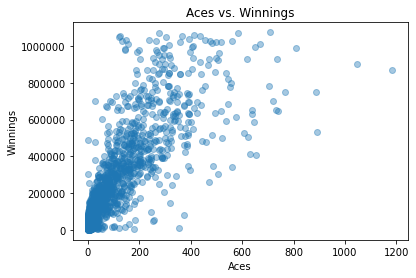

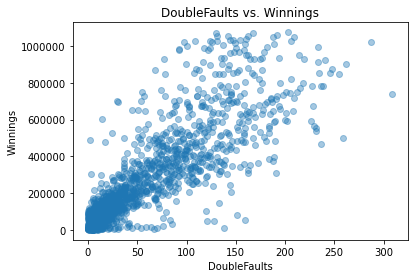

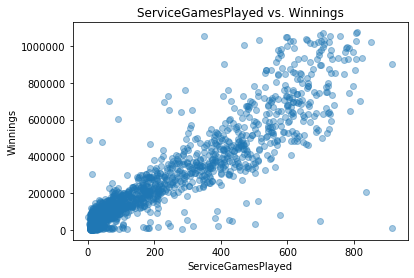

In [57]:
# Perform exploratory analysis on Service game columns

plt.clf()
plt.scatter(df[["Aces"]], df[["Winnings"]], alpha=0.4)
plt.xlabel("Aces")
plt.ylabel("Winnings")
plt.title("Aces vs. Winnings")
plt.ticklabel_format(style="plain")
plt.show()

plt.clf()
plt.scatter(df[["DoubleFaults"]], df[["Winnings"]], alpha=0.4)
plt.xlabel("DoubleFaults")
plt.ylabel("Winnings")
plt.title("DoubleFaults vs. Winnings")
plt.ticklabel_format(style="plain")
plt.show()

plt.clf()
plt.scatter(df[["ServiceGamesPlayed"]], df[["Winnings"]], alpha=0.4)
plt.xlabel("ServiceGamesPlayed")
plt.ylabel("Winnings")
plt.title("ServiceGamesPlayed vs. Winnings")
plt.ticklabel_format(style="plain")
plt.show()



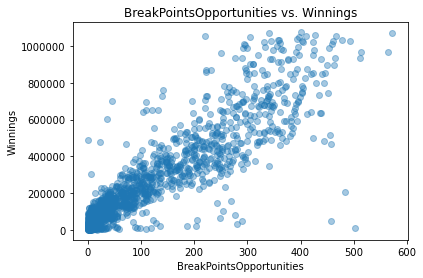

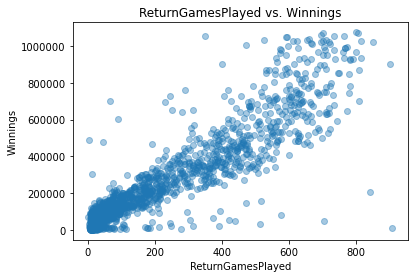

In [58]:
# # Perform exploratory analysis on Return game columns

plt.clf()
plt.scatter(df[["BreakPointsOpportunities"]], df[["Winnings"]], alpha=0.4)
plt.xlabel("BreakPointsOpportunities")
plt.ylabel("Winnings")
plt.title("BreakPointsOpportunities vs. Winnings")
plt.ticklabel_format(style="plain")
plt.show()

plt.clf()
plt.scatter(df[["ReturnGamesPlayed"]], df[["Winnings"]], alpha=0.4)
plt.xlabel("ReturnGamesPlayed")
plt.ylabel("Winnings")
plt.title("ReturnGamesPlayed vs. Winnings")
plt.ticklabel_format(style="plain")
plt.show()

0.8073161875916075


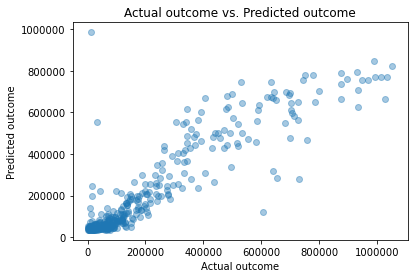

In [59]:
# Use one feature from the dataset to build a single feature linear regression model on the data
feature = df[["ServiceGamesPlayed"]]
outcome = df[["Winnings"]]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size=0.8, test_size=0.2)
model = LinearRegression()
model.fit(feature_train,outcome_train)
print(model.score(feature_test,outcome_test))

# Plot predicted outcome against actual outcome
prediction = model.predict(feature_test)
plt.clf()
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.xlabel("Actual outcome")
plt.ylabel("Predicted outcome")
plt.title("Actual outcome vs. Predicted outcome")
plt.ticklabel_format(style="plain")
plt.show()

0.8114256698010882


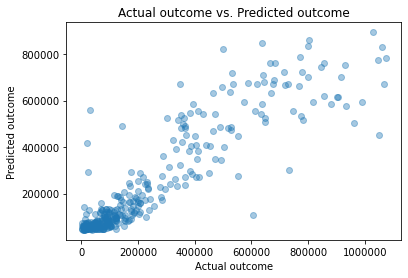

In [60]:
# Use another feature from the dataset to build a single feature linear regression model on the data
feature1 = df[["BreakPointsOpportunities"]]
outcome1 = df[["Winnings"]]

feature1_train, feature1_test, outcome1_train, outcome1_test = train_test_split(feature1, outcome1, train_size=0.8, test_size=0.2)
model1 = LinearRegression()
model1.fit(feature1_train,outcome1_train)
print(model1.score(feature1_test,outcome1_test))

# Plot predicted outcome against actual outcome
prediction1 = model1.predict(feature1_test)
plt.clf()
plt.scatter(outcome1_test,prediction1, alpha=0.4)
plt.xlabel("Actual outcome")
plt.ylabel("Predicted outcome")
plt.title("Actual outcome vs. Predicted outcome")
plt.ticklabel_format(style="plain")
plt.show()

0.8292891731007384


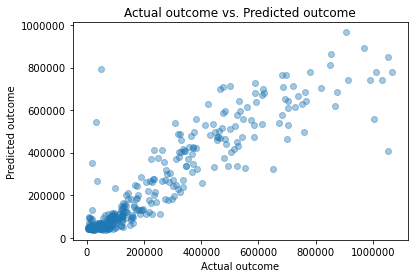

In [61]:
# Use a few features from the dataset to build a multiple features linear regression model on the data
features = df[["ServiceGamesPlayed", "BreakPointsOpportunities", "Aces"]]
outcome = df[["Winnings"]]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8, test_size=0.2)
model2 = LinearRegression()
model2.fit(features_train,outcome_train)
print(model2.score(features_test,outcome_test))

# Plot predicted outcome against actual outcome
prediction = model2.predict(features_test)
plt.clf()
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.xlabel("Actual outcome")
plt.ylabel("Predicted outcome")
plt.title("Actual outcome vs. Predicted outcome")
plt.ticklabel_format(style="plain")
plt.show()